<a href="https://colab.research.google.com/github/luciosjodin/AprendizajeAutomatico1/blob/master/TP2_AA1_Sj%C3%B6din_Lucio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copia TP1 AA1

**Sjödin Lucio**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

Para trabajar en este TP he seleccionado el dataset "Concrete_Data", que trata sobre los diferentes componentes del concreto y se puede analizar cómo afectan la fuerza compresiva del concreto, variable que será el target del modelo de regresión lineal

Importo la librería pandas y con la url del repositorio, descargo en el notebook el dataset "Concrete_Data"

In [2]:
import pandas as pd

url = 'https://github.com/luciosjodin/AprendizajeAutomatico1/raw/refs/heads/master/Concrete_Data.xls'

df = pd.read_excel(url)

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [3]:
print('Información del df:')
df.info()
print('\nAnálisis estadístico del df: ')
df.describe()

Información del df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Generación de los gráficos:

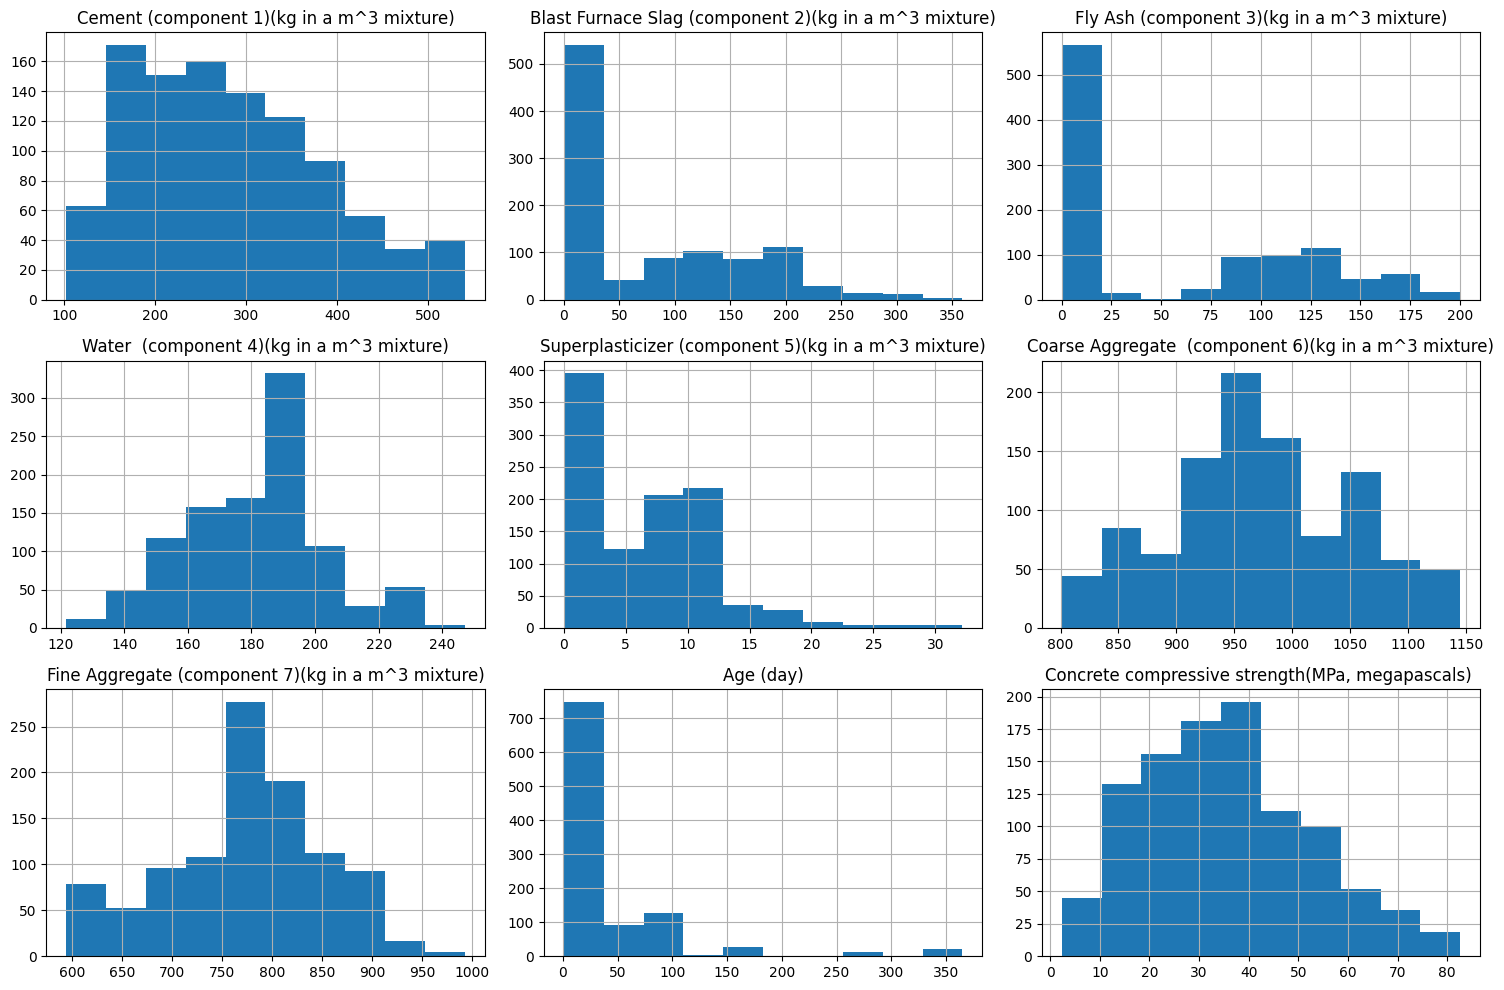

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [5]:
#Aquí ya defino de entrada el target, y las features
target = 'Concrete compressive strength(MPa, megapascals) '
features = df.columns.drop(target)

for feature in features:
    fig = px.scatter(df, x=feature, y=target,
                     title=f'{feature} vs {target}',
                     trendline="ols")
    fig.show()

**Análisis Exploratorio de Datos**

Con base en el resultado del df.describe, los histogramas, boxplots y scatterplots podemos analizar por cada variable (componente):
*   **Cement (component 1)**:
    *   **Media y Distribución:** La media es de aproximadamente 281 kg/m³. El histograma muestra una distribución que tiende a ser bimodal o con dos picos, indicando quizás dos rangos comunes de contenido de cemento en las mezclas. La distribución no parece ser perfectamente normal y hay una dispersión considerable (desviación estándar es de 104.5).
*   **Blast Furnace Slag (component 2)**:
    *   **Media y Distribución:** La media es de aproximadamente 73.9 kg/m³. El histograma muestra una distribución fuertemente sesgada hacia la izquierda, con una gran concentración de valores en 0. Esto indica que muchas mezclas no contienen escoria de alto horno. Cuando está presente, la cantidad varía considerablemente (la desviación estándar es de 86.3).
*   **Fly Ash (component 3)**:
    *   **Media y Distribución:** La media es de aproximadamente 54.2 kg/m³. Similar a la variable anterior, el histograma muestra una distribución fuertemente sesgada hacia la izquierda con muchos valores en 0, indicando que muchas mezclas tampoco contienen ceniza volátil. Cuando está presente, la cantidad varía (la desviación estándar es de casi 64).
*   **Water (component 4)**:
    *   **Media y Distribución:** La media es de aproximadamente 181.6 kg/m³. El histograma muestra una distribución que parece más simétrica, cercana a una distribución normal, aunque con una ligera cola hacia la derecha. La desviación estándar es baja (21.4) en comparación con la media, lo que sugiere que la cantidad de agua tiende a estar más concentrada alrededor de los valores de la media.
*   **Superplasticizer (component 5)**:
    *   **Media y Distribución:** La media es de aproximadamente 6.2 kg/m³. El histograma muestra una distribución fuertemente sesgada hacia la izquierda, con muchos valores en 0. Esto indica que muchas mezclas no utilizan superplastificante. Cuando se usa, la cantidad varía (casi 6 puntos de desviación estándar).
*   **Coarse Aggregate (component 6)**:
    *   **Media y Distribución:** La media es de aproximadamente 972.9 kg/m³. El histograma muestra una distribución que parece relativamente simétrica, aunque con una ligera dispersión. Los valores están bastante concentrados alrededor de la media (la desviación estándar es de 77.7).
*   **Fine Aggregate (component 7)**:
    *   **Media y Distribución:** La media es de aproximadamente 773.6 kg/m³. El histograma muestra una distribución que parece relativamente simétrica, con una dispersión moderada. La desviación estándar es de 80.2.
*   **Age (day)**:
    *   **Media y Distribución:** La media es de aproximadamente 45.7 días. El histograma muestra una distribución fuertemente sesgada hacia la derecha, con una gran concentración de datos en edades tempranas (principalmente 28 días, que es una edad de prueba común para el concreto). Hay valores significativamente más altos que representan pruebas a edades mucho mayores. La desviación estándar es de 63 puntos.
*   **Concrete compressive strength (target)**:
    *   **Media y Distribución:** La media es de aproximadamente 35.8 MPa. El histograma muestra una distribución que parece relativamente simétrica, aunque quizás con una ligera cola hacia la derecha. La desviación estándar es de 16.7 MPa, indicando una dispersión considerable en la resistencia.

**Relaciones Lineales Preliminares (basado en los Scatterplots):**
*   **Cement vs. Strength:** Se observa una **clara relación lineal positiva**. A medida que aumenta la cantidad de cemento, la resistencia a la compresión tiende a aumentar. La tendencia lineal visualizada por la línea OLS es bastante evidente.
*   **Blast Furnace Slag vs. Strength:** Parece haber una **relación lineal positiva**, aunque quizás no tan fuerte como con el cemento. La dispersión es mayor, pero la tendencia general es que más escoria se asocia con mayor resistencia.
*   **Fly Ash vs. Strength:** La relación lineal parece ser **débil o ligeramente positiva**. La dispersión es considerable y la tendencia lineal no es tan pronunciada como con el cemento o la escoria.
*   **Water vs. Strength:** Se observa una **relación lineal negativa**. A medida que aumenta la cantidad de agua, la resistencia a la compresión tiende a disminuir. Esta relación parece ser moderadamente fuerte.
*   **Superplasticizer vs. Strength:** La relación lineal parece ser **débil o ligeramente positiva**. Similar a la ceniza volátil, la dispersión es alta y la tendencia lineal no es muy marcada.
*   **Coarse Aggregate vs. Strength:** La relación lineal parece ser **muy débil o casi inexistente**. Los puntos están muy dispersos y la línea de tendencia es casi plana.
*   **Fine Aggregate vs. Strength:** La relación lineal parece ser **muy débil o ligeramente negativa**. Similar al agregado grueso, la dispersión es alta y la tendencia lineal es muy poco pronunciada.
*   **Age vs. Strength:** Se observa una **clara relación lineal positiva**. A medida que aumenta la edad del concreto, su resistencia a la compresión tiende a aumentar significativamente. La tendencia lineal es bastante fuerte, especialmente visible para edades más tempranas.

**En resumen:**

Al menos preliminarmente, las variables que parecen tener las relaciones lineales más fuertes con la resistencia a la compresión del concreto (el target) son **Cement** y **Age**, ambas con relaciones positivas. **Water** muestra una relación lineal negativa bastante notable. Las demás variables  parecen tener relaciones lineales más débiles o casi nulas con el target. Este análisis exploratorio sugiere que un modelo lineal podría capturar parte de la variabilidad en la resistencia, pero las relaciones que no son lineales  podrían ser importantes, especialmente considerando la distribución de algunas variables y la dispersión observada

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

Procedo a verificar la existencia de nulos y a observar los outliers

In [6]:
print("Valores faltantes por columna:\n")
print(df.isnull().sum())


Valores faltantes por columna:

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


No hay datos nulos

In [7]:
print("\nTipos de datos de las columnas:")
print(df.dtypes)


Tipos de datos de las columnas:
Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


Todas las features son numéricas, por lo que no se requiere codificación de variables categóricas.

In [8]:
# IQR
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = ((df[features] < lower_bound) | (df[features] > upper_bound)).sum()

print("Número de outliers por característica (usando método IQR):")
print(outliers)

# Porcentaje
total_rows = len(df)
outliers_percentage = (outliers / total_rows) * 100

print("\nPorcentaje de outliers por característica:")
print(outliers_percentage.round(2))

Número de outliers por característica (usando método IQR):
Cement (component 1)(kg in a m^3 mixture)                 0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     2
Fly Ash (component 3)(kg in a m^3 mixture)                0
Water  (component 4)(kg in a m^3 mixture)                 9
Superplasticizer (component 5)(kg in a m^3 mixture)      10
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0
Fine Aggregate (component 7)(kg in a m^3 mixture)         5
Age (day)                                                59
dtype: int64

Porcentaje de outliers por característica:
Cement (component 1)(kg in a m^3 mixture)                0.00
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.19
Fly Ash (component 3)(kg in a m^3 mixture)               0.00
Water  (component 4)(kg in a m^3 mixture)                0.87
Superplasticizer (component 5)(kg in a m^3 mixture)      0.97
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.00
Fine Aggregate (component 7)(kg 

**Análisis de los outliers según feature:**
*   **Cement (component 1)**:
    *   **Outliers:** El análisis IQR no identificó outliers significativos en esta variable.
*   **Blast Furnace Slag (component 2)**:
    *   **Outliers:** El análisis IQR identificó 2 posibles outliers, que son valores relativamente altos comparados con el resto de la distribución. Dado el sesgo, estos podrían representar mezclas con un contenido elevado de escoria, lo cual podría ser válido.
*   **Fly Ash (component 3)**:
    *   **Outliers:** El análisis IQR no identificó outliers significativos en esta variable.
*   **Water (component 4)**:
    *   **Outliers:** El análisis IQR identificó 9 posibles outliers, que son valores de agua relativamente altos.
*   **Superplasticizer (component 5)**:
    *   **Outliers:** El análisis IQR identificó 10 posibles outliers, que son valores de superplastificante relativamente altos.
*   **Coarse Aggregate (component 6)**:
    *   **Outliers:** El análisis IQR no identificó outliers significativos en esta variable.
*   **Fine Aggregate (component 7)**:
    *   **Outliers:** El análisis IQR identificó 5 posibles outliers, que son valores de agregado fino relativamente bajos.
*   **Age (day)**:
    *   **Outliers:** El análisis IQR identificó 59 posibles outliers. Dada la naturaleza de la variable "Age" (el concreto se prueba a diferentes edades para ver cómo desarrolla resistencia con el tiempo), estos valores altos son esperables y probablemente representan datos válidos de pruebas a largo plazo. No se deberían eliminar a priori.

Considerando la naturaleza del dataset y la distribución de los outliers, se decide mantener todas las características para el modelo de regresión lineal.

In [9]:
# Importación de librerías para modelo de regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() #Escalador
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDatos preprocesados exitosamente: escalados y divididos en conjuntos de entrenamiento y prueba.")
print("Forma de las características de entrenamiento:", X_train_scaled.shape)
print("Forma de las características de prueba:", X_test_scaled.shape)


Datos preprocesados exitosamente: escalados y divididos en conjuntos de entrenamiento y prueba.
Forma de las características de entrenamiento: (824, 8)
Forma de las características de prueba: (206, 8)


Los datos se han dividido en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba) y las características se han escalado usando `StandardScaler`.




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [10]:
model = LinearRegression() # Inicialización del modelo
model.fit(X_train_scaled, y_train) #Entrenamiento

coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_}) #Coeficientes
print("Coeficientes del modelo:")
display(coefficients_df)

Coeficientes del modelo:


,Feature,Coefficient
0,Cement (component 1)(kg in a m^3 mixture),12.786504
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,9.432883
2,Fly Ash (component 3)(kg in a m^3 mixture),5.255609
3,Water (component 4)(kg in a m^3 mixture),-2.892085
4,Superplasticizer (component 5)(kg in a m^3 mix...,1.841103
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.400255
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1.947380
7,Age (day),7.037787


In [11]:
import numpy as np

# Predicciones
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Resultados. Conjunto de Entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nEvaluación del conjunto de entrenamiento:")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

# Resultados. Conjunto de Prueba
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nEvaluación del conjunto de prueba:")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")


Evaluación del conjunto de entrenamiento:
RMSE: 10.52
MAE: 8.33
R-squared: 0.61

Evaluación del conjunto de prueba:
RMSE: 9.80
MAE: 7.75
R-squared: 0.63


**Basándonos en las métricas que obtuvimos:**

R-squared (R²):
* En el conjunto de entrenamiento: R² = 0.61
* En el conjunto de prueba: R² = 0.63

Un R² de 0.63 en el conjunto de prueba indica que aproximadamente el 63% de la variabilidad en la resistencia a la compresión puede ser explicada por las variables incluidas en nuestro modelo lineal.

RMSE (Root Mean Squared Error):
* En el conjunto de entrenamiento: RMSE = 10.52
* En el conjunto de prueba: RMSE = 9.80

Un RMSE de 9.80 en el conjunto de prueba significa que, en promedio, las predicciones del modelo se desvían en aproximadamente 9.80 MPa de los valores reales de resistencia a la compresión (target).

MAE (Mean Absolute Error):
* En el conjunto de entrenamiento: MAE = 8.33
* En el conjunto de prueba: MAE = 7.75

Un MAE de 7.75 en el conjunto de prueba significa que, en promedio, la magnitud del error en la predicción es de alrededor de 7.75 MPa.

**En resumen:**

El rendimiento del modelo en el conjunto de prueba es ligeramente mejor que en el conjunto de entrenamiento.

Esto sugiere que el modelo no está sufriendo de sobreajuste (overfitting) significativo.


Un R² de 0.63 indica que el modelo lineal captura una parte significativa de la relación entre las variables de entrada y la resistencia a la compresión, pero también hay una variabilidad considerable que no está siendo explicada por este modelo lineal simple.

En general, el modelo lineal proporciona una base útil, pero hay espacio para mejorar si se necesita una mayor precisión en las predicciones. Esto podría implicar explorar modelos predictivos más complejos

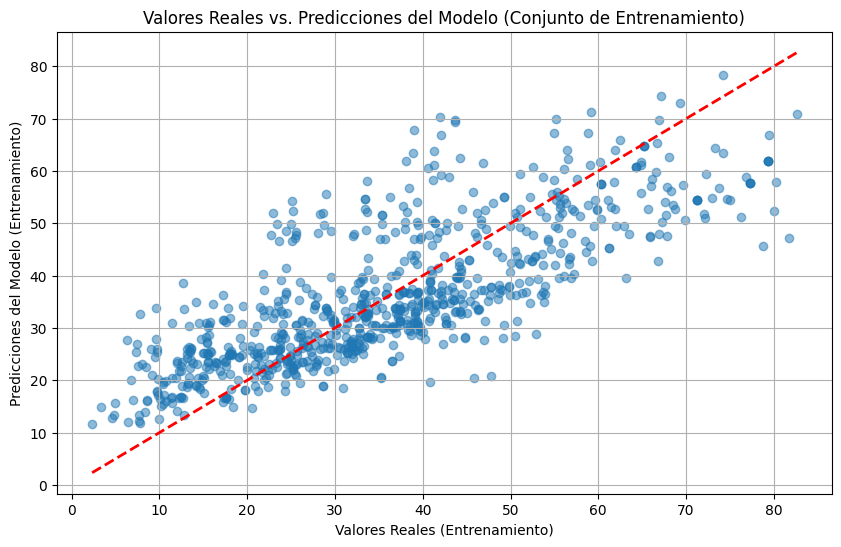

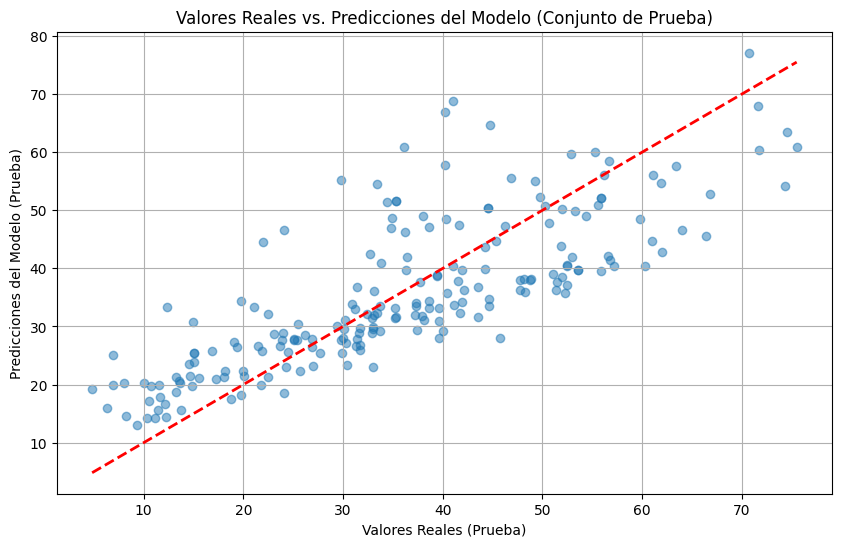

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2) # Add a diagonal line for reference
plt.xlabel("Valores Reales (Entrenamiento)")
plt.ylabel("Predicciones del Modelo (Entrenamiento)")
plt.title("Valores Reales vs. Predicciones del Modelo (Conjunto de Entrenamiento)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Add a diagonal line for reference
plt.xlabel("Valores Reales (Prueba)")
plt.ylabel("Predicciones del Modelo (Prueba)")
plt.title("Valores Reales vs. Predicciones del Modelo (Conjunto de Prueba)")
plt.grid(True)
plt.show()

**Estos gráficos muestran la relación entre los valores reales de la resistencia a la compresión del concreto y los valores predichos por el modelo de regresión lineal.**

* **Distribución de los puntos:**
    
Observamos que los puntos en ambos gráficos tienden a seguir la dirección de la línea roja (que representa la situación ideal donde los valores predichos son exactamente iguales a los valores reales). Esto indica que hay una **correlación positiva** entre los valores reales y las predicciones del modelo, lo cual es un buen signo para un modelo de regresión. A medida que los valores reales aumentan, las predicciones del modelo también tienden a aumentar.

Sin embargo, hay una **dispersión considerable** de los puntos alrededor de la línea y  esto representa los errores de predicción del modelo. 😓

En el conjunto de **entrenamiento** y en el conjunto de **prueba**, la dispersión es similar, reforzando la conclusión de que el modelo no parece estar sufriendo de sobreajuste significativo.

**En resumen:**

Los gráficos visualmente confirman que el modelo lineal tiene cierta capacidad predictiva, pero también muestran que hay margen de mejora al haber una dispersión notable alrededor de la línea de predicción perfecta. Son una buena representación visual de las métricas de error (RMSE y MAE) calculadas previamente


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

In [13]:
display(coefficients_df)

,Feature,Coefficient
0,Cement (component 1)(kg in a m^3 mixture),12.786504
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,9.432883
2,Fly Ash (component 3)(kg in a m^3 mixture),5.255609
3,Water (component 4)(kg in a m^3 mixture),-2.892085
4,Superplasticizer (component 5)(kg in a m^3 mix...,1.841103
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.400255
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1.947380
7,Age (day),7.037787


Los coeficientes nos indican la magnitud y la dirección de la relación lineal entre cada característica escalada y la resistencia a la compresión del concreto (el target), manteniendo las otras características constantes.

* Variables más importantes:

Las variables con los mayores valores absolutos en sus coeficientes son las que tienen un mayor impacto en la predicción del target. En este caso, las características con los coeficientes de mayor magnitud son:
* * Cement (component 1),
* * Blast Furnace Slag (component 2)
* * Age (day).

Esto sugiere que la cantidad de cemento y la edad del concreto son los factores más influyentes en la resistencia a la compresión del concreto según este modelo.

* Variables menos importantes:

Las variables con los menores valores absolutos en sus coeficientes son las que tienen un menor impacto en la predicción. Observando la tabla:
* * Coarse Aggregate (component 6) y
* * Superplasticizer (component 5)

Tienen los coeficientes de menor magnitud, lo que indica que su influencia lineal en la resistencia a la compresión del concreto es menor en comparación con las demás variables.

* Dirección de la relación:

Los coeficientes positivos (como los de Cement, Blast Furnace Slag, Fly Ash, Superplasticizer, Coarse Aggregate, y Fine Aggregate) indican que un aumento en la cantidad de estas variables asocia un aumento en la resistencia a la compresión del concreto. Por otro lado el coeficiente negativo de la variable "Water" indica que un aumento en la cantidad del agua está vinculado con una disminución en la resistencia a la compresión del concreto.



## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

Basándonos en el análisis de los coeficientes escalados de nuestro modelo de Regresión Lineal:

*   **Variables Más Importantes**: Las variables con los mayores valores absolutos en sus coeficientes son **Cement (component 1)** , **Blast Furnace Slag** y **Age (day)**. Esto sugiere que la cantidad de cemento, la escoria del horno y la edad del concreto son los factores más influyentes en su resistencia a la compresión del concreto. **Coincide parcialmente** con el análisis exploratorio del principio del notebook. Allí los scatter plots mostraron una tendencia positiva clara entre "Cement" y "Age" con la resistencia a la compresión del concreto.


*   **Conclusión del Rendimiento**: Un R² de 0.63 sugiere que el modelo lineal captura una parte significativa de la relación entre las variables de entrada y la resistencia a la compresión del concreto, pero también indica que hay una variabilidad considerable que no está siendo explicada por el modelo lineal. El rendimiento en el conjunto de prueba es ligeramente mejor que en el de entrenamiento (mayor R² y menor RMSE/MAE), lo que sugiere que el modelo no está sufriendo de sobreajuste (overfitting) significativo.

Los errores del modelo pueden estar ligados a que puede haber otras variables no incluidas en el dataset que influyan en la resistencia del concreto; o que existan relaciones no lineales que son incomprendidas por el modelo de regresión lineal y se queda corto, lo que sugiere utilizar un modelo predictivo más robusto.


**En resumen:**

El modelo lineal proporciona una primera aproximación útil para predecir la resistencia a la compresión del concreto y destaca la importancia clave del cemento, la escoria y la edad. Sin embargo, para obtener predicciones más precisas, podría ser necesario explorar modelos más complejos.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [14]:
# Quita de las features menos importantes
features_reduced = features.drop(['Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)'])
X_reduced = df[features_reduced]

# División de los conjuntos
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Escalado
scaler_reduced = StandardScaler()
X_train_scaled_reduced = scaler_reduced.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)

# Inicialización y entrenamiento
model_reduced = LinearRegression()
model_reduced.fit(X_train_scaled_reduced, y_train)

# Precicciones
y_train_pred_reduced = model_reduced.predict(X_train_scaled_reduced)
y_test_pred_reduced = model_reduced.predict(X_test_scaled_reduced)

# Evaluación de entrenamiento
mse_train_reduced = mean_squared_error(y_train, y_train_pred_reduced)
rmse_train_reduced = np.sqrt(mse_train_reduced)
mae_train_reduced = mean_absolute_error(y_train, y_train_pred_reduced)
r2_train_reduced = r2_score(y_train, y_train_pred_reduced)

print("Evaluación del conjunto de entrenamiento (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):")
print(f"RMSE: {rmse_train_reduced:.2f}")
print(f"MAE: {mae_train_reduced:.2f}")
print(f"R-squared: {r2_train_reduced:.2f}")

# Evaluación de prueba
mse_test_reduced = mean_squared_error(y_test, y_test_pred_reduced)
rmse_test_reduced = np.sqrt(mse_test_reduced)
mae_test_reduced = mean_absolute_error(y_test, y_test_pred_reduced)
r2_test_reduced = r2_score(y_test, y_test_pred_reduced)

print("\nEvaluación del conjunto de prueba (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):")
print(f"RMSE: {rmse_test_reduced:.2f}")
print(f"MAE: {mae_test_reduced:.2f}")
print(f"R-squared: {r2_test_reduced:.2f}")

# Comparación con el modelo original
print("\nComparación con el modelo original:")
print("Modelo Original (Conjunto de Prueba):")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

Evaluación del conjunto de entrenamiento (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):
RMSE: 10.60
MAE: 8.42
R-squared: 0.60

Evaluación del conjunto de prueba (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):
RMSE: 9.76
MAE: 7.70
R-squared: 0.63

Comparación con el modelo original:
Modelo Original (Conjunto de Prueba):
RMSE: 9.80
MAE: 7.75
R-squared: 0.63


**Análisis Bonus:**


Entrenado un nuevo modelo de regresión lineal, tras la eliminación de las variables que el análisis de coeficientes sugirió que eran menos importantes: 'Coarse Aggregate', 'Superplasticizer', y 'Fine Aggregate'.

**Conclusión Bonus:**

Eliminar las variables con los coeficientes lineales más bajos no resultó en una disminución significativa del rendimiento del modelo de regresión lineal en el conjunto de prueba. De hecho, las métricas (R², RMSE, MAE) son muy similares, e incluso particularmente mejores en el modelo reducido.

Esto podría sugerir que en algunos casos, eliminar features con baja importancia lineal (según los coeficientes) puede simplificar el modelo sin sacrificar el rendimiento en sí mismo, o incluso puede mejorarlo un poco. Es bueno para entender el impacto de las variables en el modelo.


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  


# TP2 AA1

**Sjödin Lucio**

### 2) Utilice redes neuronales para resolver el problema de regresión del dataset que Ud. trabajó en TP1.

Para ello debe:

2.1 Usar MLP con la librería MLP.

2.2 Presentar un caso donde la MLP sobreajuste.

[Tanto para 2.2, 2.3 y 2.4 deberá entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperparámetros (modificar nro de neuronas en capas ocultas, nro de capas ocultas).]

# Resolución: (‼️Ejecutar todas las celdas de código)

## Búsqueda del MLP que sobreajuste (overfitting)

Para trabajar de manera ordenada, seteo 3 configuraciones distintas de hiperparámetros, dando lugar a la prueba de 3 modelos que buscarán sobreajustar. Para ello entreno los modelos, visualizo gráficos de utilidad, analizo y concluyo la información resultante.

In [139]:
# Asumiendo la ejecución de todo código previo, por lo tanto ya están armados los conjuntos de entrenamiento, prueba. Preprocesamiento listo.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

#alpha=0 permite pesos grandes
#early_stopping=flase permite itere hasta el max_iter

# Definir los modelos
models = [
    ("mlp_sobreajuste_1", {
        'hidden_layer_sizes': (512, 256, 128, 64, 32, 16),
        'alpha': 0,
        'max_iter': 10000

    }),
    ("mlp_sobreajuste_2", {
        'hidden_layer_sizes': (256, 128, 64, 32),
        'alpha': 0,
        'max_iter': 7000

    }),
    ("mlp_sobreajuste_3", {
        'hidden_layer_sizes': (128, 64, 32, 16),
        'alpha': 0,
        'max_iter': 3000
    })
]

# Lista para almacenar resultados
results = []

# Entrenar y evaluar cada modelo
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,
        random_state=42,
    )
    mlp.fit(X_train_scaled, y_train)
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)

    # Calcular métricas
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Almacenar resultados
    results.append((name, y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test))

    # Imprimir métricas
    print(f"\n{name}:")
    print(f"MSE train: {mse_train}")
    print(f"MSE test: {mse_test}")
    print(f"RMSE train: {rmse_train:}")
    print(f"RMSE test: {rmse_test:}")
    print(f"R2 train: {r2_train}")
    print(f"R2 test: {r2_test}")




mlp_sobreajuste_1:
MSE train: 10.780361730211737
MSE test: 28.842226630097485
RMSE train: 3.283346117943056
RMSE test: 5.370495938933153
R2 train: 0.9620520344264619
R2 test: 0.8880700681471907

mlp_sobreajuste_2:
MSE train: 9.791640546866086
MSE test: 26.60308129986803
RMSE train: 3.1291597189766596
RMSE test: 5.157817493850285
R2 train: 0.9655324331706228
R2 test: 0.8967596671658595

mlp_sobreajuste_3:
MSE train: 10.174340000347417
MSE test: 30.074531998897275
RMSE train: 3.1897241260565807
RMSE test: 5.484025163955511
R2 train: 0.9641852923186585
R2 test: 0.883287779396721


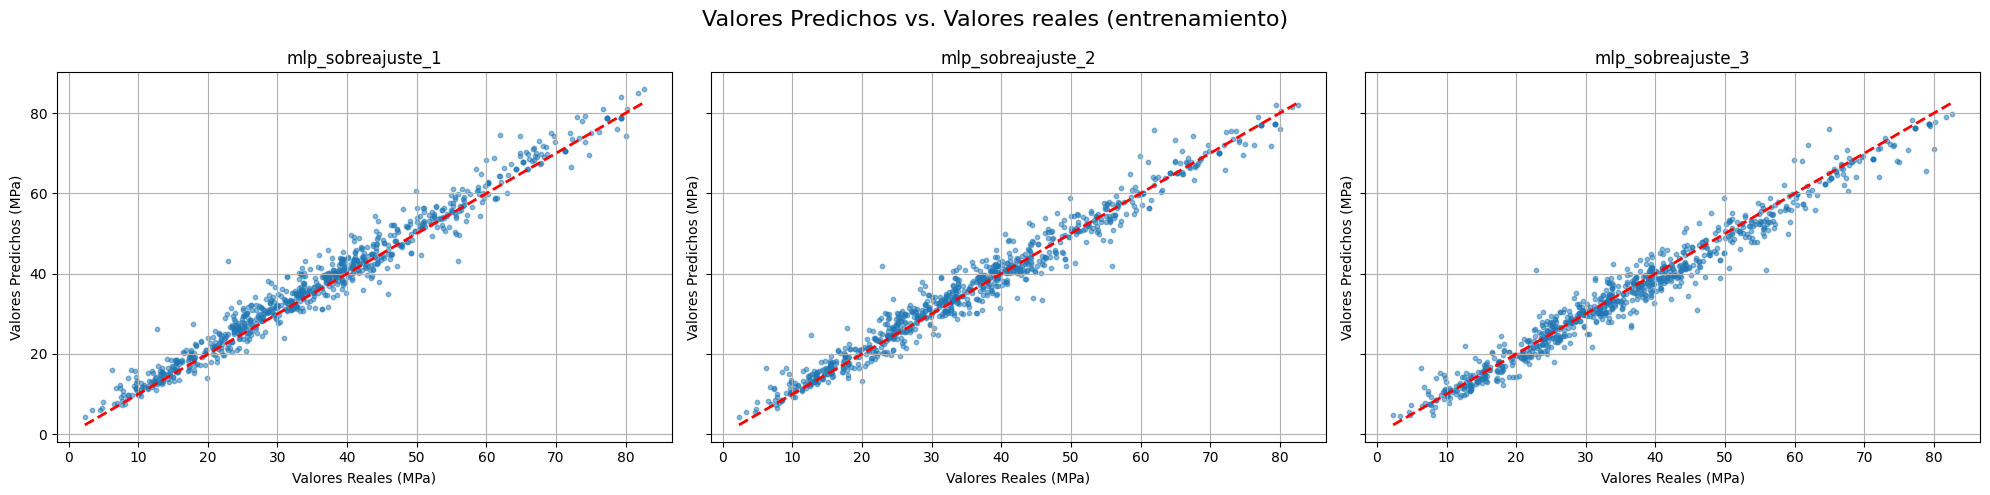

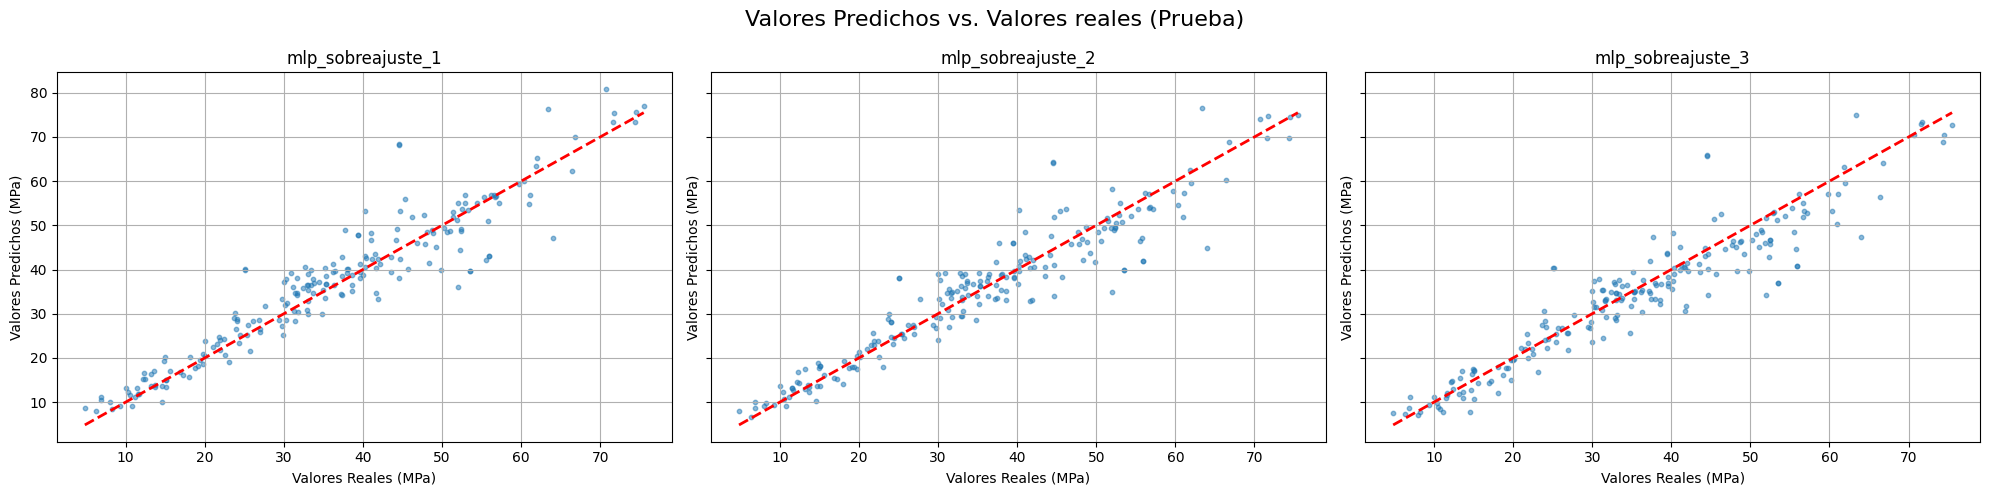

In [122]:
# Crear gráfico con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (entrenamiento)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_train, y_train_pred, alpha=0.5, s=10)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Línea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Crear gráfico con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (Prueba)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_test, y_test_pred, alpha=0.5, s=10)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

*   **Gráficos de Dispersión (Valores Predichos vs. Valores Reales):**
    *   En los gráficos del **conjunto de entrenamiento**, los puntos para los tres modelos están muy cerca de la línea roja diagonal, lo que indica que el modelo predice con mucha precisión los valores de entrenamiento. Esto es consistente con un alto R² de entrenamiento y un bajo MSE de entrenamiento.
    *   En los gráficos del **conjunto de prueba**, aunque los puntos aún siguen la tendencia de la línea diagonal, hay una **mayor dispersión** alrededor de esta línea para los tres modelos, especialmente visible en el gráfico de `mlp_sobreajuste_3`. Esta mayor dispersión en el conjunto de prueba, en comparación con el conjunto de entrenamiento, es una clara señal visual de sobreajuste. El modelo no predice los valores de prueba con la misma precisión que los de entrenamiento.

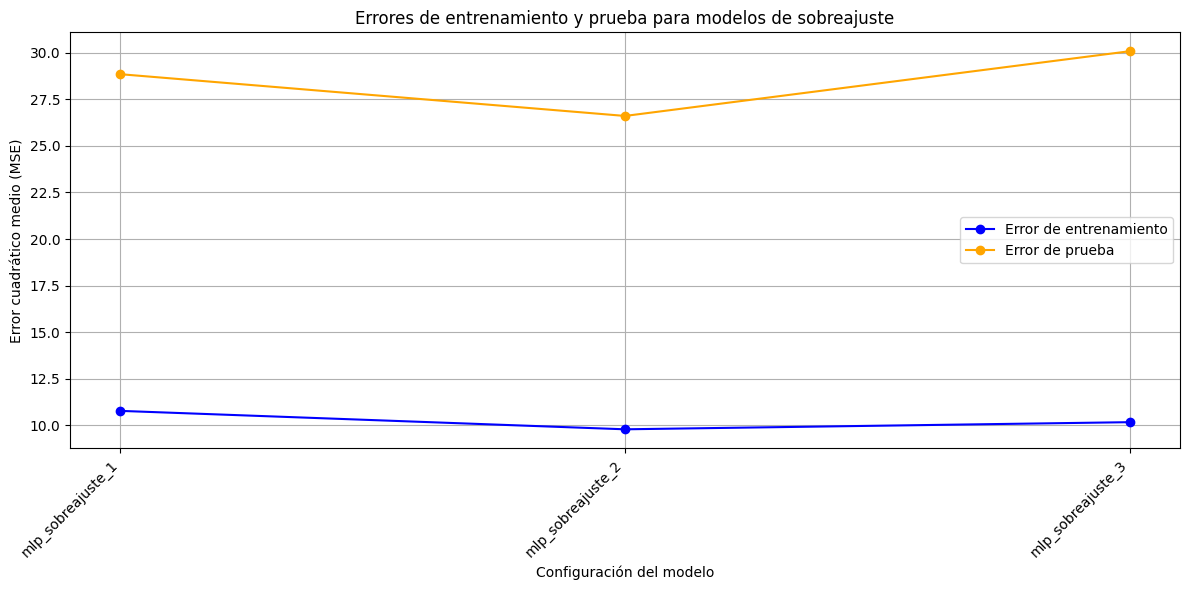

In [123]:
# Graficamos los errores de entrenamiento y prueba
# Usamos los nombres de los modelos y los MSE almacenados en results
model_labels = [result[0] for result in results]
train_error_values = [result[3] for result in results]  # MSE train
test_error_values = [result[4] for result in results]   # MSE test

plt.figure(figsize=(12, 6))
x = np.arange(len(model_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o', color='blue')
plt.plot(x, test_error_values, label='Error de prueba', marker='o', color='orange')
plt.xticks(x, model_labels, rotation=45, ha='right')
plt.xlabel('Configuración del modelo')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Errores de entrenamiento y prueba para modelos de sobreajuste')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

*   **Gráfico de Errores de Entrenamiento y Prueba (MSE):**
    *   Este gráfico muestra claramente la brecha entre el MSE de entrenamiento (línea azul) y el MSE de prueba (línea naranja) para cada modelo. Para todos los modelos, el MSE de entrenamiento es significativamente menor que el MSE de prueba.
    *   La mayor diferencia entre la línea azul y la línea naranja se observa en el modelo `mlp_sobreajuste_3`, lo que visualmente confirma que este modelo es el que presenta el mayor sobreajuste, ya que su error en datos no vistos es mucho mayor que su error en los datos con los que fue entrenado.

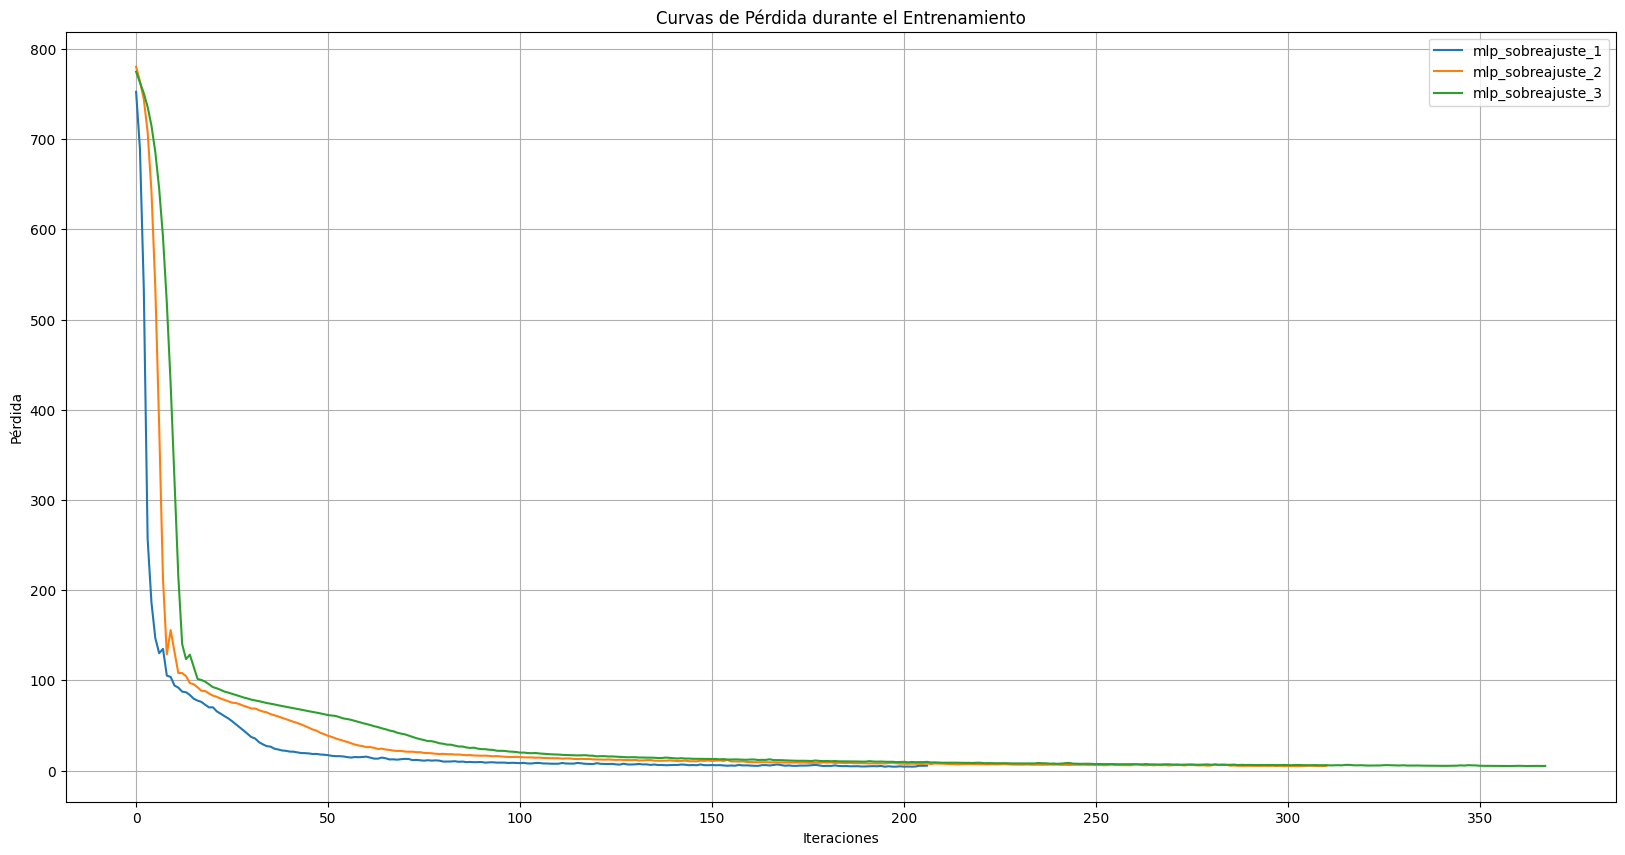

In [125]:
plt.figure(figsize=(20, 10))
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,  # Ajusta según tu caso
        random_state=42,
    )
    mlp.fit(X_train_scaled, y_train)
    plt.plot(mlp.loss_curve_, label=name)
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.title('Curvas de Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

*   **Gráfico de Curvas de Pérdida:**
    *   Las curvas de pérdida para los tres modelos de sobreajuste (`mlp_sobreajuste_1`, `mlp_sobreajuste_2`, `mlp_sobreajuste_3`) muestran una disminución constante en la pérdida a lo largo de las iteraciones, alcanzando valores muy bajos. Esto indica que el optimizador (adam) está funcionando y el modelo está aprendiendo a minimizar el error en el conjunto de entrenamiento.

**Análisis de los Modelos de Sobreajuste:**

Para determinar qué modelo sobreajusta más, observamos la diferencia entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba. Un modelo sobreajustado tiene un rendimiento significativamente mejor en los datos de entrenamiento que en los datos de prueba.

Analizando los resultados de las métricas:

*   **mlp\_sobreajuste\_1:**
    *   MSE train: 10.78
    *   MSE test: 28.84
    *   R2 train: 0.96
    *   R2 test: 0.89
*   **mlp\_sobreajuste\_2:**
    *   MSE train: 9.79
    *   MSE test: 26.60
    *   R2 train: 0.97
    *   R2 test: 0.90
*   **mlp\_sobreajuste\_3:**
    *   MSE train: 10.17
    *   MSE test: 30.07
    *   R2 train: 0.96
    *   R2 test: 0.88

**Conclusión sobre el Sobreajuste:**

Todos los modelos (`mlp_sobreajuste_1`, `mlp_sobreajuste_2`, y `mlp_sobreajuste_3`) muestran signos de sobreajuste, ya que el R² es notablemente más alto en el conjunto de entrenamiento que en el conjunto de prueba, y el MSE es significativamente menor en entrenamiento que en prueba. Esto indica que los modelos se ajustaron demasiado bien a los datos de entrenamiento y no generalizan tan bien a datos no vistos.

Observando la mayor diferencia entre el rendimiento en entrenamiento y prueba, el modelo **`mlp_sobreajuste_3`** es el que sobreajusta más severamente. Tiene un R² de entrenamiento de 0.96 pero un R² de prueba de solo 0.88, lo que representa una caída mayor en el rendimiento comparado con los otros modelos. De manera similar, la diferencia entre su MSE de entrenamiento (10.17) y su MSE de prueba (30.07) es la más grande.


### 2.3 Presentar un caso donde la MLP subajuste.

## Búsqueda del MLP que subajuste (underfitting)

In [138]:
# Definir los modelos para subajuste
models = [
    ("mlp_subajuste_1", {
        'hidden_layer_sizes': (16,),  # Muy simple, 1 capa con pocas neuronas
        'alpha': 10.0,              # Alta regularización
        'max_iter': 50             # Muy pocas iteraciones
    }),
    ("mlp_subajuste_2", {
        'hidden_layer_sizes': (8, 8),  # 2 capas, pero con pocas neuronas
        'alpha': 1.0,                   # Regularización moderada-alta
        'max_iter': 75                 # Iteraciones limitadas
    }),
    ("mlp_subajuste_3", {
        'hidden_layer_sizes': (8,),  # 1 capa con neuronas moderadas
        'alpha': 0.1,                # Regularización ligera
        'max_iter': 200              # Iteraciones moderadas
    })
]

# Lista para almacenar resultados
results = []

# Entrenar y evaluar cada modelo
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)

    # Calcular métricas
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Almacenar resultados
    results.append((name, y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test))

    # Imprimir métricas
    print(f"\n{name}:")
    print(f"MSE train: {mse_train}")
    print(f"MSE test: {mse_test}")
    print(f"RMSE train: {rmse_train:}")
    print(f"RMSE test: {rmse_test:}")
    print(f"R2 train: {r2_train}")
    print(f"R2 test: {r2_test}")



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.




mlp_subajuste_1:
MSE train: 1323.2035023106646
MSE test: 1286.3318084646237
RMSE train: 36.37586428266227
RMSE test: 35.86546818967548
R2 train: -3.6578103971919225
R2 test: -3.9919527194651856

mlp_subajuste_2:
MSE train: 754.3940853255297
MSE test: 723.9589240833257
RMSE train: 27.46623536863998
RMSE test: 26.906484796110504
R2 train: -1.6555436167401854
R2 test: -1.8095151624777985

mlp_subajuste_3:
MSE train: 543.5964087147338
MSE test: 537.4799053689234
RMSE train: 23.315154057280722
RMSE test: 23.183612862729643
R2 train: -0.9135144367183028
R2 test: -1.085833730930457


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



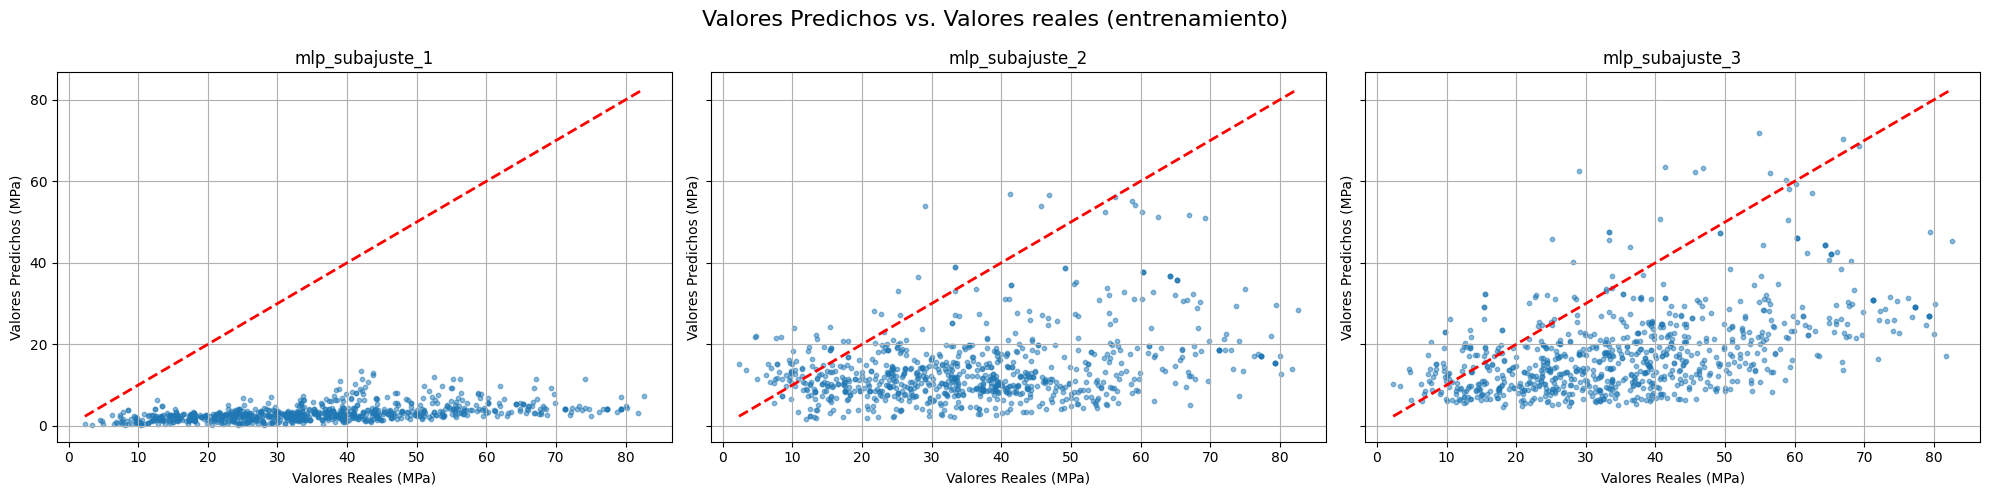

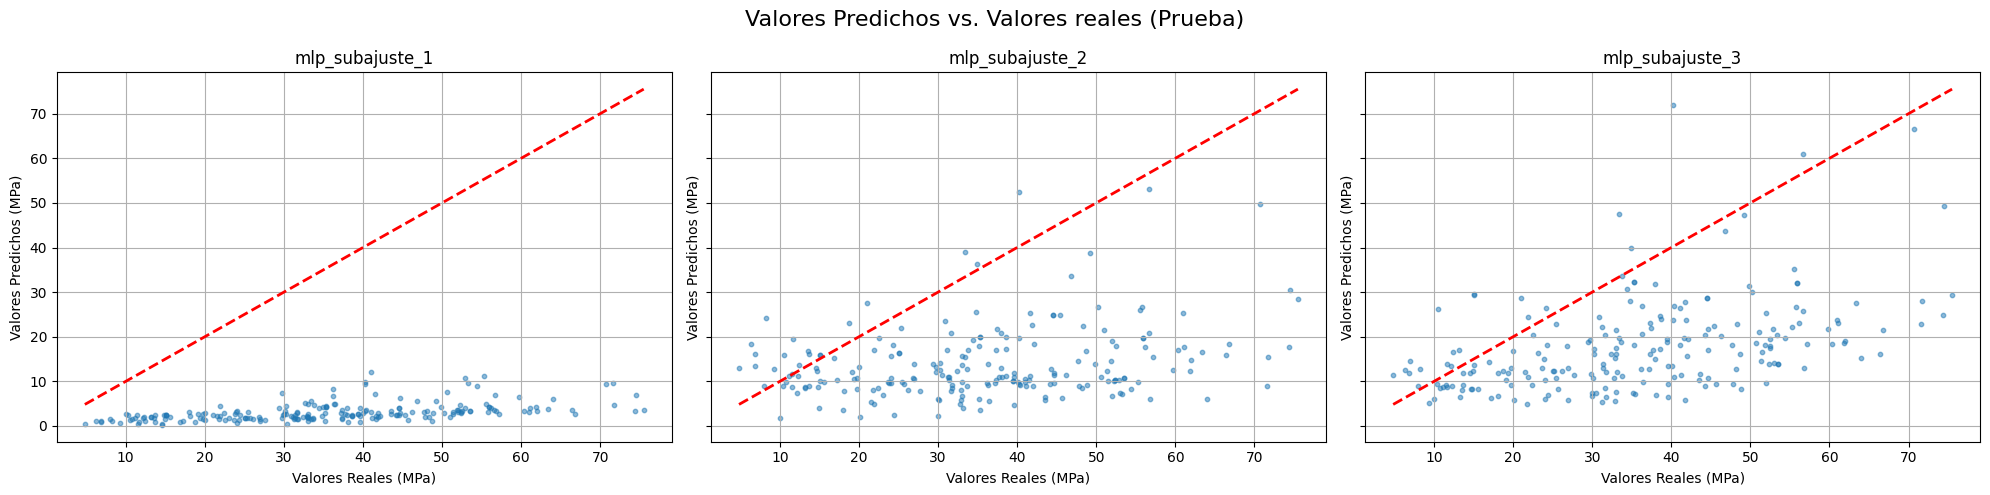

In [127]:
# Crear gráfico con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (entrenamiento)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_train, y_train_pred, alpha=0.5, s=10)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Línea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Crear gráfico con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (Prueba)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_test, y_test_pred, alpha=0.5, s=10)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

* **Gráficos de Dispersión (Valores Predichos vs. Valores Reales):**
  * En los gráficos tanto del **conjunto de entrenamiento** como del **conjunto de prueba**, los puntos para los tres modelos de subajuste están muy dispersos y no siguen de cerca la línea roja diagonal. Esto indica que las predicciones del modelo son muy pobres y no tienen una correlación fuerte con los valores reales.
  * La dispersión es muy similar entre los conjuntos de entrenamiento y prueba para cada modelo, lo que refuerza la idea de subajuste (el modelo no aprende bien en entrenamiento, por lo tanto, tampoco generaliza bien). El gráfico para `mlp_subajuste_1` muestra la mayor dispersión y los puntos más alejados de la línea ideal.

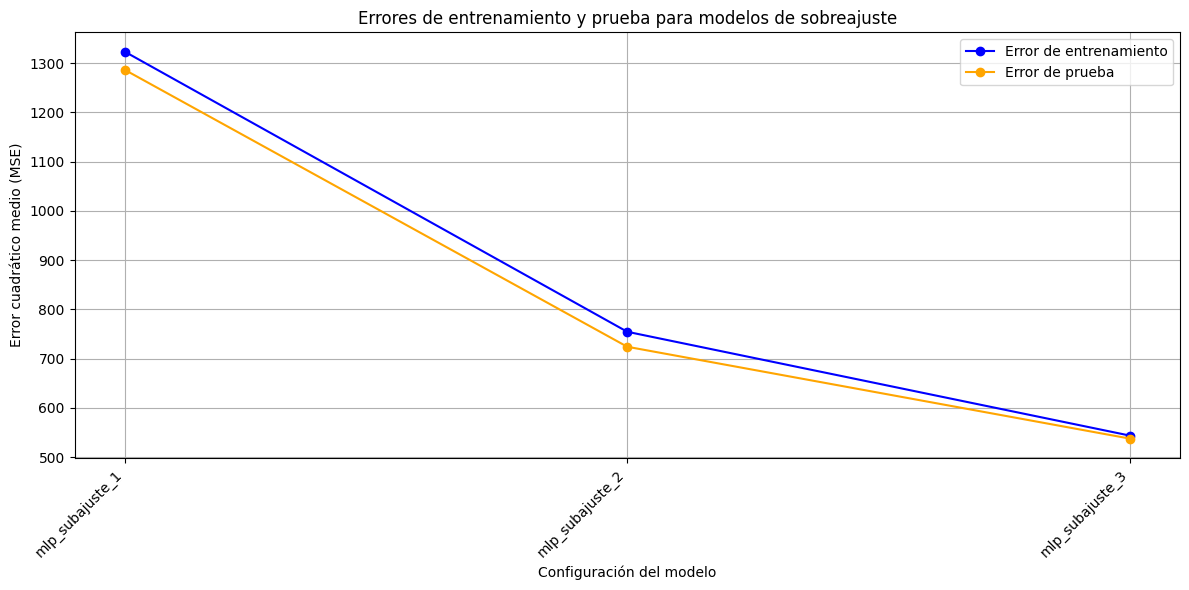

In [128]:
# Graficamos los errores de entrenamiento y prueba
# Usamos los nombres de los modelos y los MSE almacenados en results
model_labels = [result[0] for result in results]
train_error_values = [result[3] for result in results]  # MSE train
test_error_values = [result[4] for result in results]   # MSE test

plt.figure(figsize=(12, 6))
x = np.arange(len(model_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o', color='blue')
plt.plot(x, test_error_values, label='Error de prueba', marker='o', color='orange')
plt.xticks(x, model_labels, rotation=45, ha='right')
plt.xlabel('Configuración del modelo')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Errores de entrenamiento y prueba para modelos de sobreajuste')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

* **Gráfico de Errores de Entrenamiento y Prueba (MSE):**
  * Este gráfico muestra MSEs extremadamente altos para los tres modelos, con el MSE de `mlp_subajuste_1` siendo el más alto. La diferencia entre el MSE de entrenamiento y prueba es relativamente pequeña para todos ellos (en comparación con el sobreajuste), lo que es otra característica del subajuste. El modelo no aprende bien ni en entrenamiento ni en prueba.


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



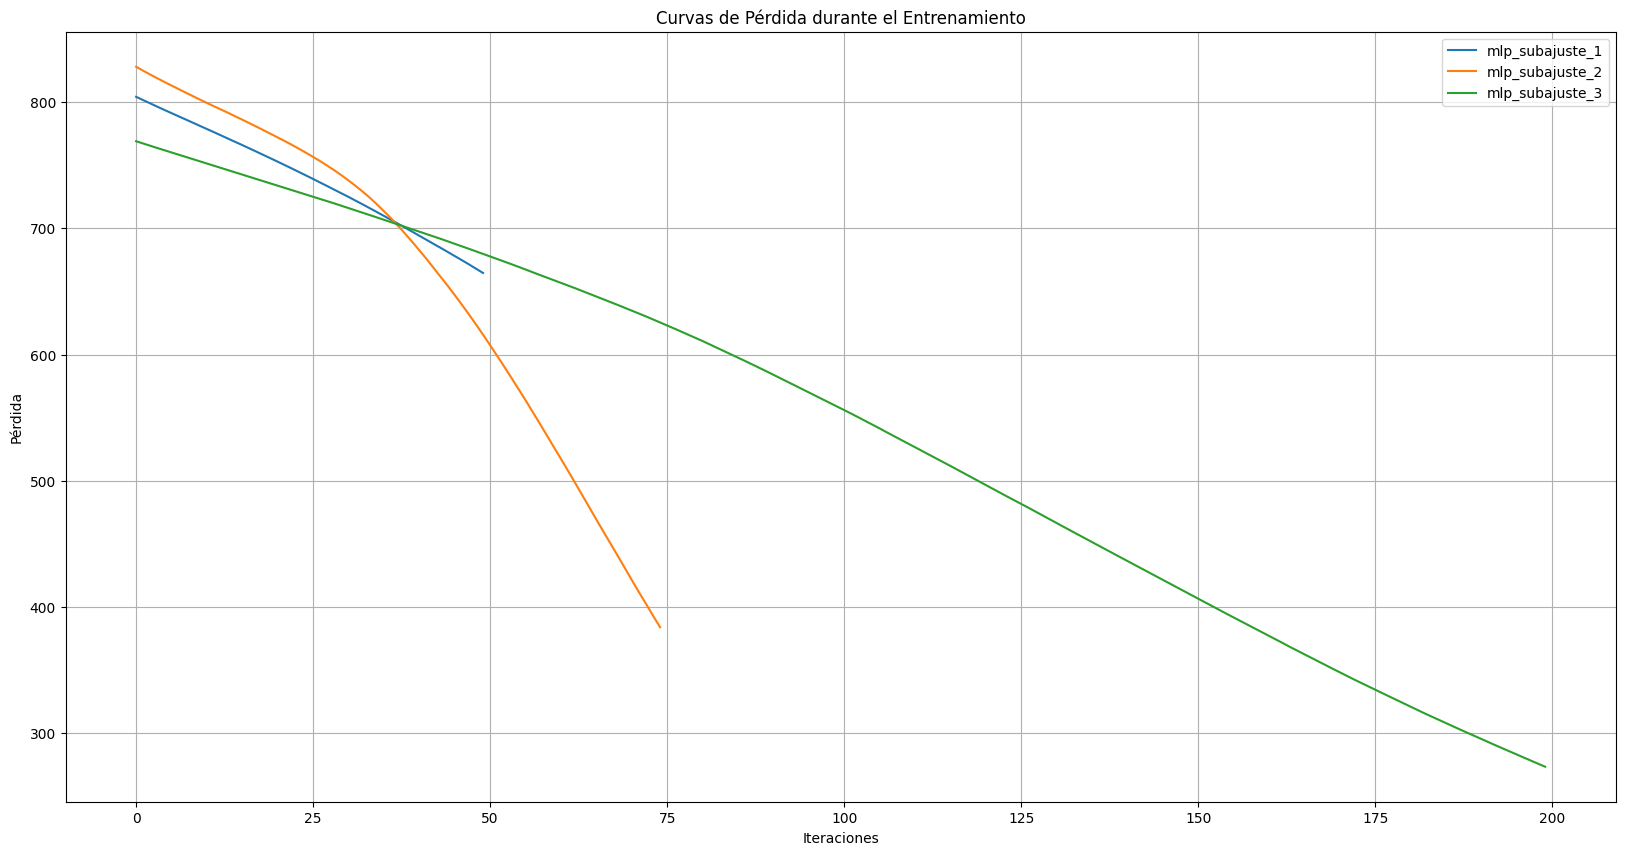

In [129]:
plt.figure(figsize=(20, 10))
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,  # Ajusta según tu caso
        random_state=42,
    )
    mlp.fit(X_train_scaled, y_train)
    plt.plot(mlp.loss_curve_, label=name)
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.title('Curvas de Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

* **Gráfico de Curvas de Pérdida:**
  * Las curvas de pérdida para los modelos de subajuste (`mlp_subajuste_1`, `mlp_subajuste_2`, `mlp_subajuste_3`) muestran que la pérdida no disminuye significativamente o se estanca en un valor alto. En el caso de `mlp_subajuste_1`, la pérdida se mantiene en un nivel muy alto y no muestra una tendencia clara a disminuir debido a la arquitectura limitada y la alta regularización que impiden el aprendizaje. Para `mlp_subajuste_2` y `mlp_subajuste_3`, las pérdidas bajan un poco más pero aún se mantienen relativamente altas y no convergen bien debido a las iteraciones limitadas y/o regularización. Las advertencias de convergencia en la salida de la celda de código confirman que los modelos no terminaron de entrenarse completamente dentro del número de iteraciones especificado, lo que contribuye al subajuste.

**Análisis de los Modelos de Subajuste:**

Para determinar qué modelo subajusta más, observamos su rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba. Un modelo subajustado no logra aprender bien las relaciones en los datos de entrenamiento, lo que resulta en un rendimiento deficiente (bajo R² y alto MSE/MAE) tanto en entrenamiento como en prueba, con una pequeña diferencia entre ambos conjuntos.

Analizando los resultados de las métricas:

* **mlp\_subajuste\_1:**
  * MSE train: 1323.20
  * MSE test: 1286.33
  * R2 train: -3.66
  * R2 test: -3.99
* **mlp\_subajuste\_2:**
  * MSE train: 754.39
  * MSE test: 723.96
  * R2 train: -1.66
  * R2 test: -1.81
* **mlp\_subajuste\_3:**
  * MSE train: 543.60
  * MSE test: 537.48
  * R2 train: -0.91
  * R2 test: -1.09

**Conclusión sobre el Subajuste:**

Todos los modelos (`mlp_subajuste_1`, `mlp_subajuste_2`, y `mlp_subajuste_3`) muestran signos claros de subajuste. Sus valores de R² son negativos, lo que indica que su rendimiento es incluso peor que un modelo lineal simple que predice la media del target. Los valores de MSE son extremadamente altos en comparación con la variabilidad del target.

Observando las métricas, el modelo **`mlp_subajuste_1`** es el que subajusta más severamente. Tiene el R² más bajo (más negativo) tanto en entrenamiento como en prueba, y el MSE más alto. Esto indica que este modelo fue el que tuvo más dificultades para aprender cualquier patrón en los datos.

Las razones principales de este subajuste extremo en `mlp_subajuste_1` son:
* **`hidden_layer_sizes`: (16,)** - Una arquitectura extremadamente simple con solo una capa oculta y muy pocas neuronas. Esta capacidad limitada le impide capturar la complejidad de las relaciones en el dataset.
* **`alpha`: 10.0** - Una regularización (L2) muy alta. Esta penalización fuerte sobre los pesos limita severamente la capacidad del modelo para ajustarse a los datos, incluso a los de entrenamiento.
* **`max_iter`: 50** - Un número muy bajo de iteraciones. El modelo no tuvo tiempo suficiente para que el optimizador encontrara un buen conjunto de pesos, especialmente con la alta regularización y la simple arquitectura.



### 2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

## Búsqueda del MLP aceptable

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir los modelos para un ajuste aceptable
models = [
    ("mlp_aceptable_1", {
        'hidden_layer_sizes': (128, 64, 32),  # 3 capas complejas
        'alpha': 0.0001,                 # Regularización ligera
        'max_iter': 1000                # Iteraciones suficientes
    }),
    ("mlp_aceptable_2", {
        'hidden_layer_sizes': (64, 32),  # 2 capas un poco más moderadas
        'alpha': 0.001,                  # Regularización moderada
        'max_iter': 1000                   # Iteraciones moderadas
    }),
    ("mlp_aceptable_3", {
        'hidden_layer_sizes': (32, 16),  # 1 capa simple
        'alpha': 0.01,               # Regularización un poco más alta
        'max_iter': 1000              # Iteraciones limitadas pero suficientes
    })
]

# Lista para almacenar resultados
results = []

# Entrenar y evaluar cada modelo
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=True,  # Activar early stopping para evitar sobreajuste
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)

    # Calcular métricas
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Almacenar resultados
    results.append((name, y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test))

    # Imprimir métricas
    print(f"\n{name}:")
    print(f"MSE train: {mse_train}")
    print(f"MSE test: {mse_test}")
    print(f"RMSE train: {rmse_train:}")
    print(f"RMSE test: {rmse_test:}")
    print(f"R2 train: {r2_train}")
    print(f"R2 test: {r2_test}")




mlp_aceptable_1:
MSE train: 27.19748356623111
MSE test: 40.730852409584806
RMSE train: 5.215120666507258
RMSE test: 6.382072736155927
R2 train: 0.9042621021550884
R2 test: 0.8419330936899911

mlp_aceptable_2:
MSE train: 28.679664462552974
MSE test: 33.35144829458997
RMSE train: 5.355339808317766
RMSE test: 5.7750712804769755
R2 train: 0.8990446752231376
R2 test: 0.8705708341217159

mlp_aceptable_3:
MSE train: 26.312189009898052
MSE test: 38.94493488766036
RMSE train: 5.1295408186209075
RMSE test: 6.240587703707108
R2 train: 0.9073784286928165
R2 test: 0.8488638216496398


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



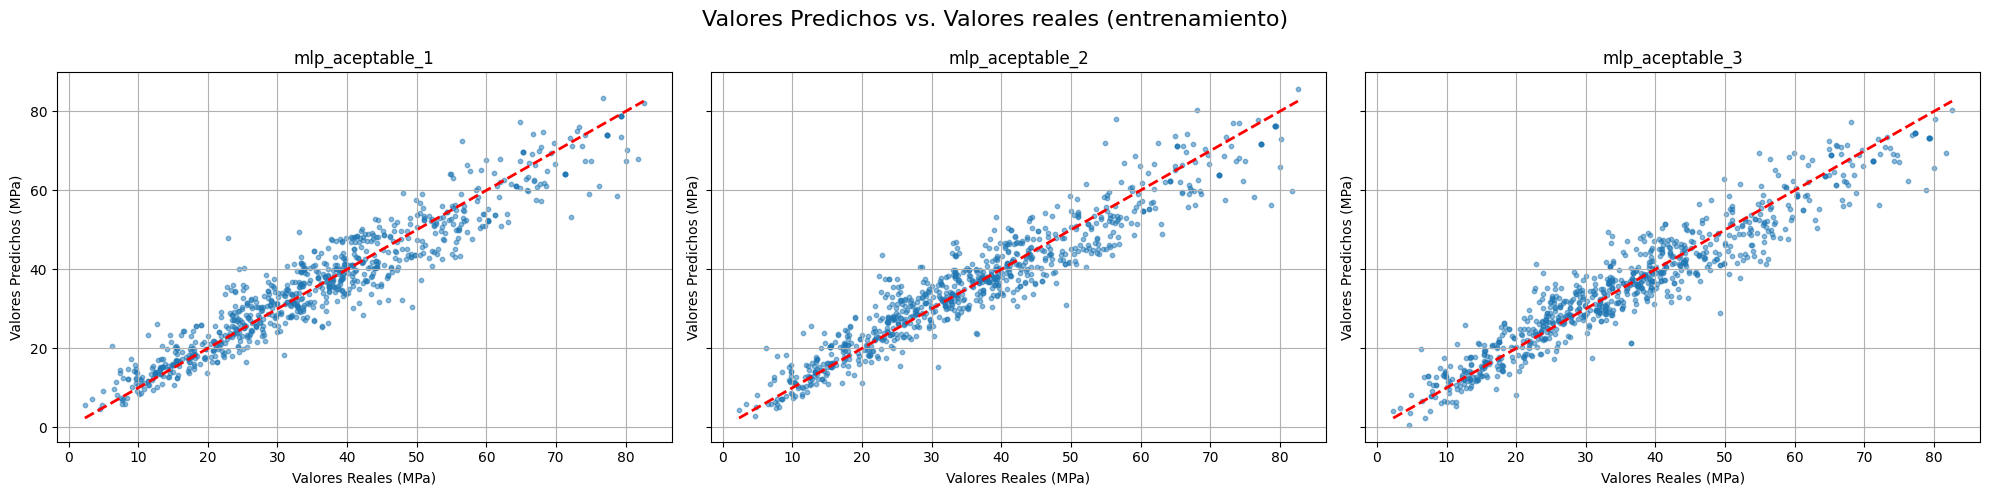

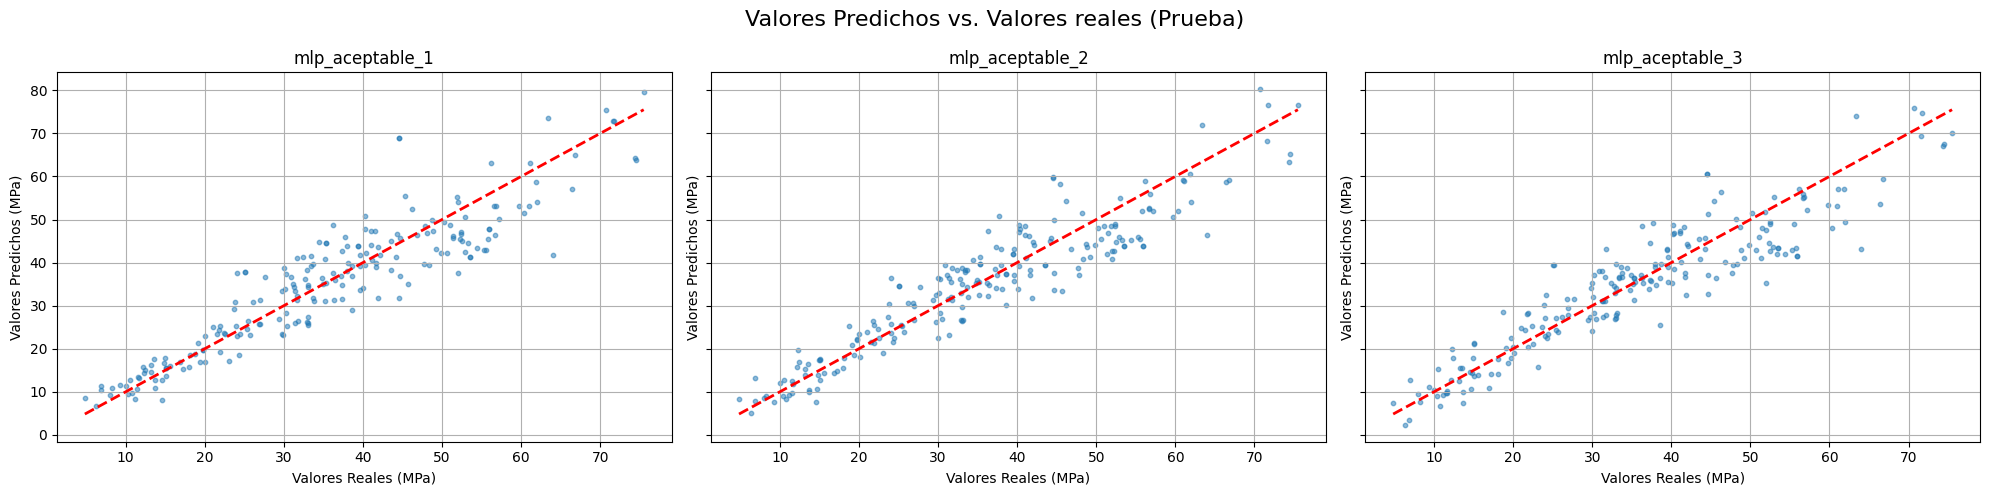

In [131]:
# Crear gráfico con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (entrenamiento)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_train, y_train_pred, alpha=0.5, s=10)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Línea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Crear gráfico con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (Prueba)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_test, y_test_pred, alpha=0.5, s=10)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

* **Gráficos de Dispersión (Valores Predichos vs. Valores Reales):**
  * En los gráficos del **conjunto de entrenamiento**, los puntos para los tres modelos están relativamente cerca de la línea roja diagonal, lo que indica que aprendieron los patrones en los datos de entrenamiento.
  * En los gráficos del **conjunto de prueba**, la dispersión de los puntos alrededor de la línea roja es mayor que en el entrenamiento, lo cual es esperado y refleja el error de generalización. Sin embargo, el gráfico para **`mlp_aceptable_2`** muestra visualmente una **menor dispersión general** en comparación con los otros dos modelos "aceptables". Los puntos tienden a agruparse más cerca de la línea ideal en el conjunto de prueba para este modelo, lo que respalda su mejor rendimiento de generalización.

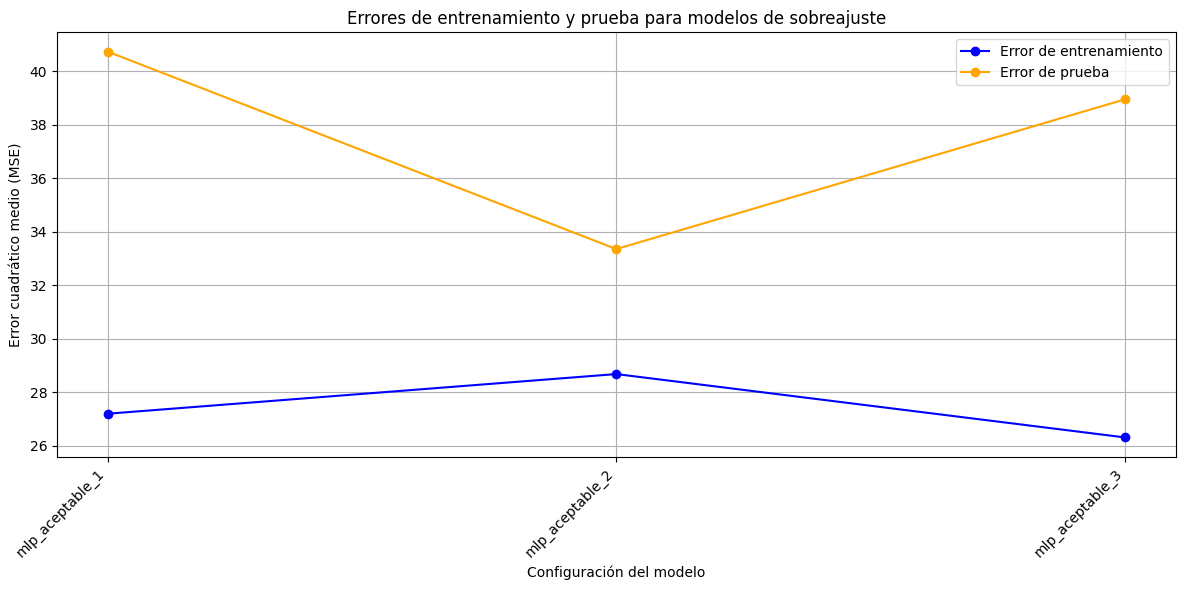

In [132]:
# Graficamos los errores de entrenamiento y prueba
# Usamos los nombres de los modelos y los MSE almacenados en results
model_labels = [result[0] for result in results]
train_error_values = [result[3] for result in results]  # MSE train
test_error_values = [result[4] for result in results]   # MSE test

plt.figure(figsize=(12, 6))
x = np.arange(len(model_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o', color='blue')
plt.plot(x, test_error_values, label='Error de prueba', marker='o', color='orange')
plt.xticks(x, model_labels, rotation=45, ha='right')
plt.xlabel('Configuración del modelo')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Errores de entrenamiento y prueba para modelos de sobreajuste')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

* **Gráfico de Errores de Entrenamiento y Prueba (MSE):**
  * Este gráfico muestra la brecha entre el MSE de entrenamiento y el MSE de prueba para cada modelo. Para los modelos "aceptables", esta brecha es menor en comparación con los modelos de sobreajuste analizados anteriormente.
  * La **menor brecha** entre las líneas azul y naranja se observa en el modelo **`mlp_aceptable_2`**, lo que confirma visualmente que este modelo presenta un mejor equilibrio entre el rendimiento en entrenamiento y prueba, indicando una mejor generalización y menor sobreajuste.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



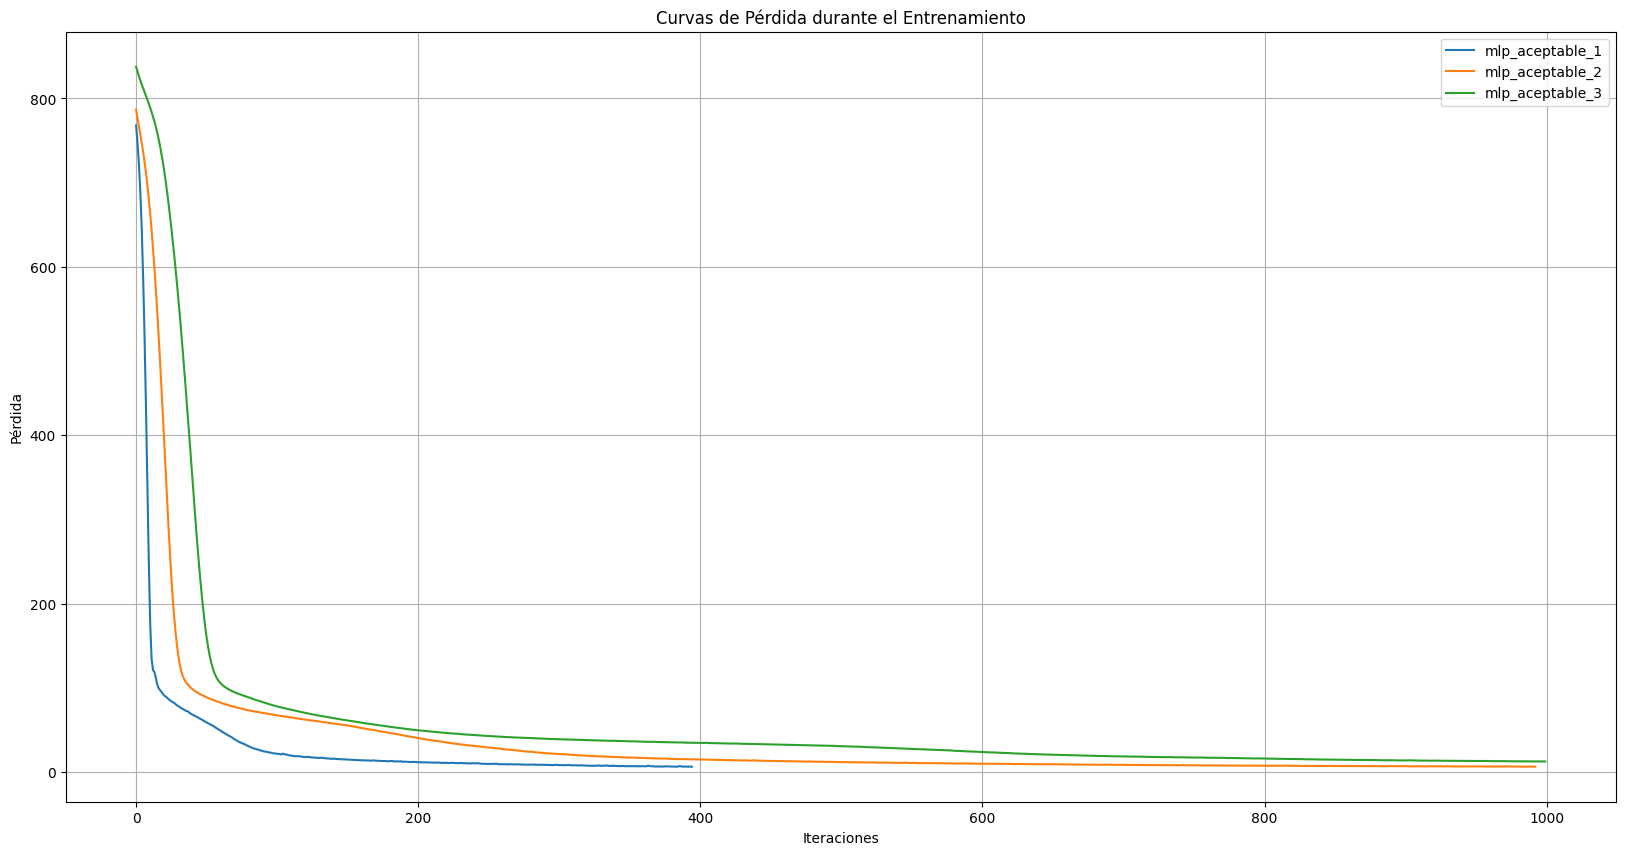

In [133]:
plt.figure(figsize=(20, 10))
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,  # Ajusta según tu caso
        random_state=42,
    )
    mlp.fit(X_train_scaled, y_train)
    plt.plot(mlp.loss_curve_, label=name)
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.title('Curvas de Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

  * Las curvas de pérdida para los modelos "aceptables" muestran una disminución inicial y luego tienden a estabilizarse. La inclusión de `early_stopping=True` significa que el entrenamiento se detiene cuando la pérdida en un conjunto de validación (no mostrado explícitamente, pero utilizado por `early_stopping`) deja de disminuir. Esto ayuda a prevenir que el modelo continúe ajustándose excesivamente a los datos de entrenamiento una vez que ha aprendido patrones generalizables. Las curvas alcanzan valores de pérdida mucho más bajos que los modelos de subajuste, pero no tan bajos como los modelos de sobreajuste que fueron entrenados por un número excesivo de iteraciones sin regularización.

**Análisis de los Modelos MLP "Aceptables":**

Para determinar cuál de los modelos MLP configurados como "aceptables" funciona mejor, analizamos sus métricas de rendimiento (R², MSE, MAE) en el conjunto de prueba, ya que estas métricas son indicativas de la capacidad de generalización del modelo a datos no vistos. También consideramos la brecha entre el rendimiento en el conjunto de entrenamiento y prueba para evaluar si hay signos de sobreajuste.

Analizando los resultados de las métricas para los modelos "aceptables":

* **mlp\_aceptable\_1:**
  * MSE train: 27.20
  * MSE test: 40.73
  * R2 train: 0.90
  * R2 test: 0.84
* **mlp\_aceptable\_2:**
  * MSE train: 28.68
  * MSE test: 33.35
  * R2 train: 0.90
  * R2 test: 0.87
* **mlp\_aceptable\_3:**
  * MSE train: 26.31
  * MSE test: 38.94
  * R2 train: 0.91
  * R2 test: 0.85

**Determinación del Modelo Más Aceptable:**

Observando las métricas del conjunto de prueba, el modelo **`mlp_aceptable_2`** parece ser el más aceptable entre las configuraciones probadas. Aunque su R² de entrenamiento (0.90) y MSE de entrenamiento (28.68) no son los "mejores" en comparación con los otros dos modelos en el conjunto de entrenamiento, su rendimiento en el **conjunto de prueba** es superior:

* Tiene el **R² de prueba más alto (0.87)**. Esto indica que explica la mayor proporción de la variabilidad en la resistencia a la compresión en datos no vistos.
* Tiene el **MSE de prueba más bajo (33.35)**. Esto significa que sus predicciones tienen el error cuadrático medio más bajo en datos no vistos, lo que implica que sus predicciones están, en promedio, más cerca de los valores reales.

Además, la brecha entre el R² de entrenamiento y prueba, y entre el MSE de entrenamiento y prueba, es relativamente pequeña para `mlp_aceptable_2` (0.90 vs 0.87 para R², y 28.68 vs 33.35 para MSE), lo que sugiere que este modelo logra un mejor equilibrio entre el ajuste a los datos de entrenamiento y la generalización a datos nuevos, minimizando el sobreajuste en comparación con `mlp_aceptable_1` y `mlp_aceptable_3` (que muestran una mayor caída en el rendimiento del entrenamiento a la prueba).

La configuración de `mlp_aceptable_2` (`hidden_layer_sizes`: (64, 32), `alpha`: 0.001, `max_iter`: 1000, con `early_stopping=True`) parece haber encontrado un buen punto de equilibrio. La regularización moderada (`alpha=0.001`) ayuda a evitar el sobreajuste, y las capas ocultas (`(64, 32)`) proporcionan suficiente capacidad para aprender las relaciones en los datos sin ser excesivamente complejas, mientras que `early_stopping` detiene el entrenamiento cuando el rendimiento en un conjunto de validación (utilizado internamente por `early_stopping=True`) deja de mejorar.

### Conclusiones:

2.5 Agregue sus conclusiones comparando la experiencia y resultados del modelo de regresión lineal con el modelo del punto 2.4)

**Métricas del Modelo de Regresión Lineal (TP1):**

*   R-squared (Test): 0.63
*   RMSE (Test): 9.80

**Métricas del Modelo MLP (`mlp_aceptable_2`) (TP2):**

*   R-squared (Test): 0.87
*   RMSE (Test): 5.77




**Análisis de la Comparación:**

Al comparar las métricas en el conjunto de prueba, observamos una diferencia significativa en el rendimiento entre ambos modelos:

1.  **R-squared (R²):** El modelo MLP (`mlp_aceptable_2`) tiene un R² de prueba mucho más alto (0.87) en comparación con el modelo de Regresión Lineal (0.63). Esto significa que el MLP es capaz de explicar una proporción mucho mayor de la variabilidad en la resistencia a la compresión del concreto en datos no vistos que el modelo lineal. El MLP captura mejor la relación subyacente entre las características y el target.

2.  **RMSE (Error Cuadrático Medio de la Raíz):** El RMSE de prueba del modelo MLP (`mlp_aceptable_2`) (5.7) es considerablemente menor que el del modelo de Regresión Lineal (9.8). Un RMSE más bajo indica que las predicciones del MLP están, en promedio, mucho más cerca de los valores reales de la resistencia a la compresión que las predicciones del modelo lineal. La magnitud de los errores cuadráticos es significativamente menor en el modelo MLP.


**Conclusión General:**

El modelo de Red Neuronal Multicapa (`mlp_aceptable_2`), con una arquitectura y regularización adecuadas, demuestra un **rendimiento superior** al modelo de Regresión Lineal para predecir la resistencia a la compresión del concreto en este dataset. El MLP es capaz de capturar relaciones más complejas en los datos que un modelo lineal simple, lo que se traduce en una mayor capacidad explicativa (mayor R²) y errores de predicción cuadráticos significativamente menores (menor MSE) en datos no vistos.

Esto confirma que para este problema particular, un modelo no lineal como el MLP es más adecuado para capturar la complejidad de la relación entre los componentes del concreto, la edad y su resistencia.